<a href="https://colab.research.google.com/github/SHIVANKARSHIVANKAR/Corsera_Deeplearning_Practice/blob/main/DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import torch
import numpy as np
import torchvision
import matplotlib
import matplotlib.pyplot as plt
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.utils.data import random_split
from torchvision.transforms import ToTensor
from torchvision.datasets import MNIST
import torch.nn.functional as F 
%matplotlib inline
matplotlib.rcParams['figure.facecolor']='#ffffff'

In [58]:
dataset=MNIST(root='data/',train=True,download=True,transform=ToTensor())

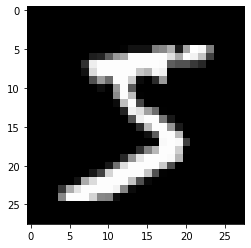

In [59]:
img,label=dataset[0]
img.shape
i=(img.squeeze())
i.shape
plt.imshow(i,cmap='gray')

In [60]:
train_size=50000
val_size=10000
train_ds,val_ds=random_split(dataset,[train_size,val_size])
len(train_ds),len(val_ds)

(50000, 10000)

In [61]:
batch_size=128
train_loader=DataLoader(train_ds,batch_size,shuffle=True,num_workers=4,pin_memory=True)
val_loader=DataLoader(val_ds,batch_size*2,num_workers=4,pin_memory=True)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


torch.Size([128, 1, 28, 28])


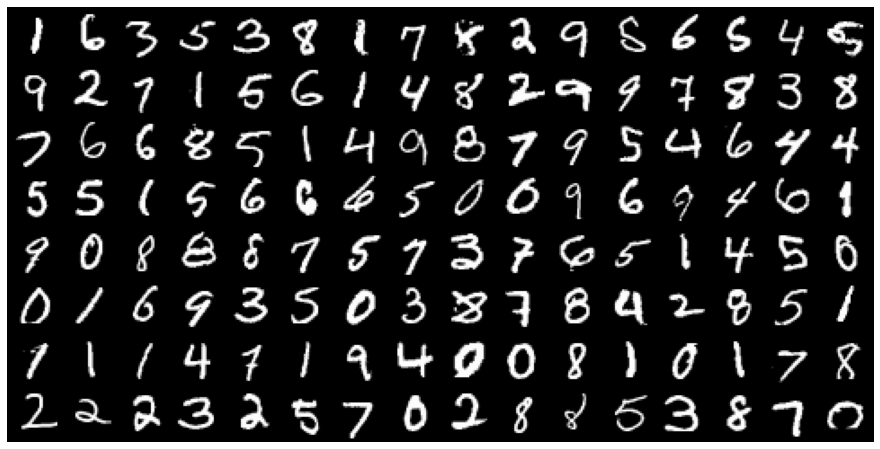

In [62]:
from torchvision.utils import make_grid
for images,labels in train_loader:
  print(images.shape)
  plt.figure(figsize=(16,8))
  plt.axis('off')
  plt.imshow(make_grid(images,nrow=16).permute(1,2,0))
  break

In [63]:
for images,labels in train_loader:
  inputs=images.reshape((-1,784))
  print(inputs.shape)
  break

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


torch.Size([128, 784])


In [64]:
input_size=input.shape[-1]
layer1=nn.Linear(input_size,32)

In [65]:
layer1_output=layer1(inputs)
layer1_output.shape

torch.Size([128, 32])

In [66]:
layer1.weight

Parameter containing:
tensor([[-0.0007, -0.0045, -0.0341,  ...,  0.0244,  0.0015, -0.0222],
        [ 0.0091, -0.0355, -0.0355,  ...,  0.0110, -0.0089, -0.0158],
        [-0.0031,  0.0255, -0.0297,  ...,  0.0189, -0.0118,  0.0285],
        ...,
        [ 0.0031, -0.0253,  0.0189,  ...,  0.0025,  0.0210, -0.0017],
        [ 0.0317,  0.0133, -0.0124,  ...,  0.0227, -0.0255,  0.0352],
        [-0.0116,  0.0207,  0.0221,  ..., -0.0165,  0.0287, -0.0167]],
       requires_grad=True)

In [84]:
class MnistModel(nn.Module):
  def __init__(self,input_size,hidden_size,out_size):
    super().__init__()
    #hidden layer
    self.layer1=nn.Linear(input_size,hidden_size)
    #output layer
    self.layer2=nn.Linear(hidden_size,out_size)
  def forward(self,xb):
    #flatten the image tensor
    xb=xb.view(xb.size(0),-1)
    #get intermediate output using hidden layer
    out=self.layer1(xb)
    #activation function
    out=F.relu(out)
    #get prediction using output layer
    out=self.layer2(out)
    return out
  def training_step(self,batch):
     images,labels=batch
     out =self(images)
     loss=F.cross_entropy(out,labels)
     return loss
  def validation_step(self,batch):
      images,labels=batch
      out=self(images)
      loss=F.cross_entropy(out,labels)
      acc=accuracy(out,labels)
      return {'val_loss': loss, 'val_acc': acc}
  def validation_epoch_end(self,outputs):
      batch_losses = [x['val_loss'] for x in outputs]
      epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
      batch_accs = [x['val_acc'] for x in outputs]
      epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
      return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
  def epoch_end(self, epoch, result):
      print(f"Epoch: {epoch}, val_loss:{result['val_loss']:.4f},val_acc{result['val_acc']}")



In [85]:
def accuracy(outputs,labels):
  _, preds=torch.max(outputs,dim=1)
  return torch.tensor(torch.sum(preds==labels).item()/len(preds))

In [86]:
model=MnistModel(784,32,10)

In [87]:
for t in model.parameters():
  print(t.shape)

torch.Size([32, 784])
torch.Size([32])
torch.Size([10, 32])
torch.Size([10])


In [88]:
torch.cuda.is_available()

False

In [89]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

In [90]:
device = get_default_device()
device

device(type='cpu')

In [91]:
def to_device(data,device):
  if isinstance(data,(list,tuple)):
    return [to_device(x,device) for x in data]
  return data.to(device, non_blocking=True)

In [92]:
for images, labels in train_loader:
    print(images.shape)
    images = to_device(images, device)
    print(images.device)
    break

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


torch.Size([128, 1, 28, 28])
cpu


In [93]:
def evaluate(model, val_loader):
    """Evaluate the model's performance on the validation set"""
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    """Train the model using gradient descent"""
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [94]:
model=MnistModel(784,32,10)
his1=fit(5,0.5,model,train_loader,val_loader)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: 0, val_loss:0.2306,val_acc0.93408203125
Epoch: 1, val_loss:0.1847,val_acc0.944140613079071
Epoch: 2, val_loss:0.1730,val_acc0.94775390625
Epoch: 3, val_loss:0.1436,val_acc0.95703125
Epoch: 4, val_loss:0.1354,val_acc0.956835925579071
